In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.fft import fft, ifft, fftshift

# Define a Dirac sum s(x) = sum(a_i * delta(x - x_i))
def dirac_sum(domain_size, atoms, masses):
    s = np.zeros(domain_size)
    for atom, mass in zip(atoms, masses):
        s[atom] += mass
    return s

# Define the Gaussian kernel
def gaussian_kernel(size, sigma):
    x = np.linspace(-size // 2, size // 2, size)
    g = np.exp(-x**2 / (2 * sigma**2))
    g /= g.sum()  # Normalize
    return g

# Convolve a signal with the Gaussian kernel
def convolve_signal(s, g):
    f = convolve(s, g, mode='same')
    return f

# Deconvolve a signal (Recover s from f and g)
def deconvolve_signal(f, g, regularization=1e-3):
    g_padded = np.zeros_like(f)
    g_padded[:len(g)] = g
    g_padded = fftshift(g_padded)

    F = fft(f)
    G = fft(g_padded)

    S = F * np.conj(G) / (np.abs(G)**2 + regularization)
    s = np.real(ifft(S))
    return s


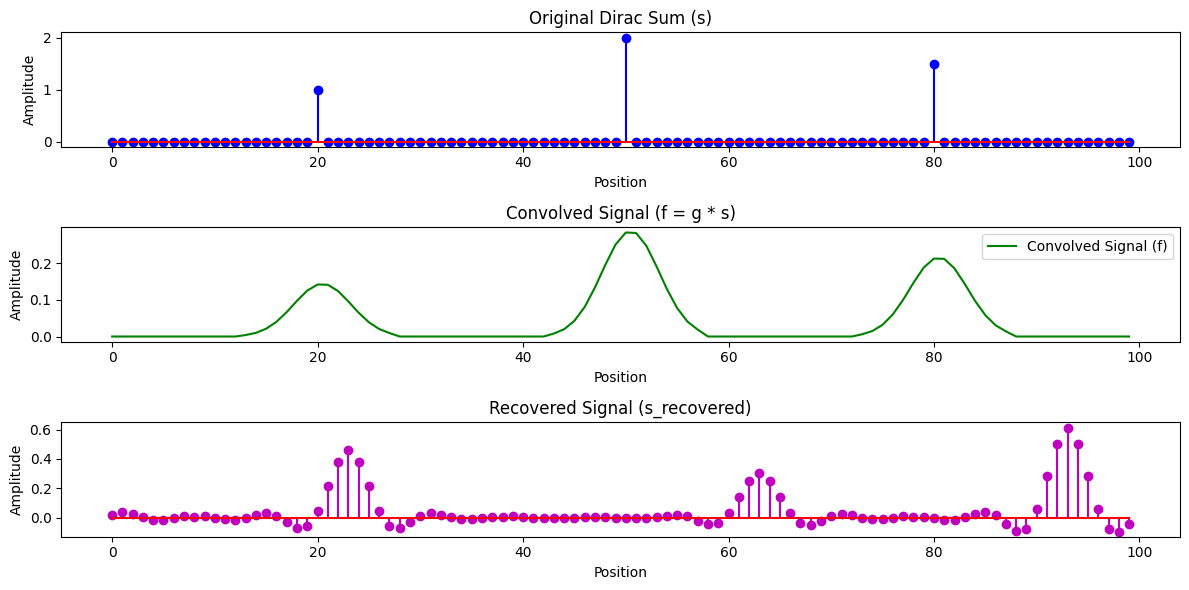

In [6]:

# Parameters
domain_size = 100
atoms = [20, 50, 80]
masses = [1.0, 2.0, 1.5]
kernel_size = 15
sigma = 3.0
regularization = 1e-3

# Generate data
s = dirac_sum(domain_size, atoms, masses)
g = gaussian_kernel(kernel_size, sigma)
f = convolve_signal(s, g)
s_recovered = deconvolve_signal(f, g, regularization)

# Plot the results
x = np.arange(domain_size)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.stem(x, s, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title("Original Dirac Sum (s)")
plt.xlabel("Position")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(x, f, 'g-', label="Convolved Signal (f)")
plt.title("Convolved Signal (f = g * s)")
plt.xlabel("Position")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3, 1, 3)
plt.stem(x, s_recovered, linefmt='m-', markerfmt='mo', basefmt='r-')
plt.title("Recovered Signal (s_recovered)")
plt.xlabel("Position")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


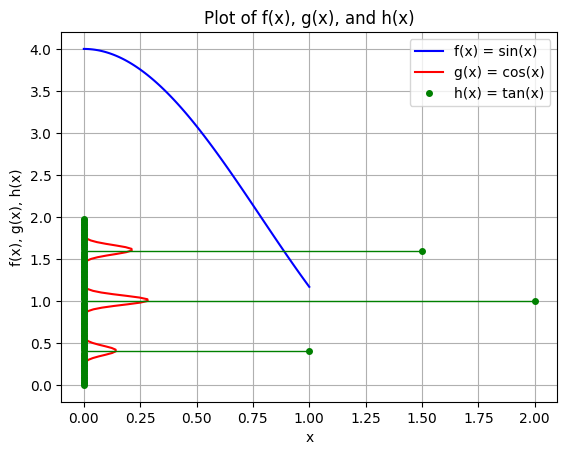

In [27]:
domain_size = 100
atoms = [20, 50, 80]
masses = [1.0, 2.0, 1.5]
kernel_size = 15
sigma = 3.0
regularization = 1e-3

# Generate data
x = 2*np.arange(domain_size)/domain_size
s = dirac_sum(domain_size, atoms, masses)
g = gaussian_kernel(kernel_size, sigma)
f = convolve_signal(s, g)

t= np.linspace(0,1,100)
h = np.pow(2*np.cos(t),2)

# Create the plot
fig, ax = plt.subplots()

# Plot f(x) horizontally (standard line plot)
ax.plot(t, h, label='f(x) = sin(x)', color='b')

# Plot g(x) vertically (standard line plot)
ax.plot(f, x, label='g(x) = cos(x)', color='r')

# Plot horizontal "stems" manually by drawing lines for each point of the stem
ax.hlines(x, 0, s, color='g', linewidth=1)  # Horizontal lines for stems
ax.plot(s, x, 'go', label='h(x) = tan(x)', markersize=4)  # Markers

# Labeling and aesthetics
ax.set_xlabel('x')
ax.set_ylabel('f(x), g(x), h(x)')
ax.set_title('Plot of f(x), g(x), and h(x)')
ax.legend()

# Show grid and plot
plt.grid(True)
plt.show()